In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Student_Performance_Mat.csv')

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
#convert categorical values to numerical values 
label1=LabelEncoder()
df["school"]=label1.fit_transform(df["school"])
df["sex"]=label1.fit_transform(df["sex"])
df["address"]=label1.fit_transform(df["address"])
df["famsize"]=label1.fit_transform(df["famsize"])
df["Pstatus"]=label1.fit_transform(df["Pstatus"])
df["Medu"]=label1.fit_transform(df["Medu"])
df["Mjob"]=label1.fit_transform(df["Mjob"])
df["Fjob"]=label1.fit_transform(df["Fjob"])
df["reason"]=label1.fit_transform(df["reason"])
df["guardian"]=label1.fit_transform(df["guardian"])
df["schoolsup"]=label1.fit_transform(df["schoolsup"])
df["famsup"]=label1.fit_transform(df["famsup"])
df["paid"]=label1.fit_transform(df["paid"])
df["activities"]=label1.fit_transform(df["activities"])
df["nursery"]=label1.fit_transform(df["nursery"])
df["higher"]=label1.fit_transform(df["higher"])
df["internet"]=label1.fit_transform(df["internet"])
df["romantic"]=label1.fit_transform(df["romantic"])
df['G1'] = df['G1'].map(lambda x: str(x).replace('""','')).astype('float')
df['G2'] = df['G2'].map(lambda x: str(x).replace('""','')).astype('float')
df['G3'] = df['G3'].map(lambda x: str(x).replace('"','')).astype('float')
df=pd.get_dummies(df, drop_first=True, columns=["Mjob"])
df=pd.get_dummies(df, drop_first=True, columns=["Fjob"])
df=pd.get_dummies(df, drop_first=True, columns=["reason"])
df=pd.get_dummies(df, drop_first=True, columns=["guardian"])

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_4,Fjob_1,Fjob_2,Fjob_3,Fjob_4,reason_1,reason_2,reason_3,guardian_1,guardian_2
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,0,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,0,0,1,0,0,0,0,0,1,0


In [7]:
Y = df.iloc[:,28].values #identify label G3

In [8]:
df = df.drop(['G3'],axis=1) #remove label from df

In [9]:
#identify features 
X = df.iloc[:,:41].values 
#Scale data
sc = StandardScaler()
X = sc.fit_transform(X)
 


In [41]:
#Initial train/test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#Final split resulting in a 60/20/20 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [43]:
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.1))
# Adding the second hidden layer
model.add(Dense(41, kernel_initializer='normal', activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.1))
# Adding the third hidden layer
model.add(Dense(41, kernel_initializer='normal', activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(rate=0.1))
# Adding the output layer
model.add(Dense(1, kernel_initializer='normal'))
#set the learning rate
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compiling the ANN
model.compile(loss='mean_squared_error', optimizer='sgd')
# Fitting the ANN  
model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100, verbose=0)
   
# Predictions from our model
pred = model.predict(x_test)  

# Print RMSE
output = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"RMSE is: {output}")

RMSE is: 1.8364693465660262


Text(0, 0.5, 'G3')

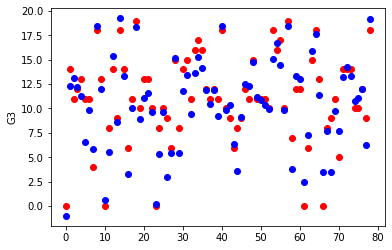

In [44]:
#plot the actual values of G3 in red and the predicted values of G3 in blue
plt.plot(y_test,'ro', pred, 'bo')
plt.ylabel('G3')


In [45]:
#10-fold cross-validation
kf = KFold(10, shuffle=True, random_state=2) 
   
total_y = []  #store y_test values  
total_pred = [] #store predicted values

fold = 0 #keep track which fold the loop is in
for train, test in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = Y[train]
    x_test = X[test]
    y_test = Y[test]
    
    model = Sequential()
    # Adding the input layer and the first hidden layer
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate=0.1))
    # Adding the second hidden layer
    model.add(Dense(41, kernel_initializer='normal', activation='relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate=0.1))
    # Adding the third hidden layer
    model.add(Dense(41, kernel_initializer='normal', activation='relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate=0.1))
    # Adding the output layer
    model.add(Dense(1, kernel_initializer='normal'))
    #set the learning rate
    sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
    
    # Compiling the ANN
    model.compile(loss='mean_squared_error', optimizer='sgd')
    # Fitting the ANN  
    model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100, verbose=0)
    # Predictions from our model
    pred = model.predict(x_test)
    
    total_y.append(y_test)
    total_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print(f'Root Mean Square Error for fold {fold} is {score}')
    

# Print average RMSE
total_y = np.concatenate(total_y)
total_pred = np.concatenate(total_pred)
output = np.sqrt(metrics.mean_squared_error(total_pred,total_y))
print(f"Average Root Mean Square Error is {output}")

Fold #1
Root Mean Square Error for fold 1 is 2.1263829628984823
Fold #2
Root Mean Square Error for fold 2 is 1.8747019841172334
Fold #3
Root Mean Square Error for fold 3 is 1.867836994666684
Fold #4
Root Mean Square Error for fold 4 is 2.243197941188511
Fold #5
Root Mean Square Error for fold 5 is 2.1781465412637893
Fold #6
Root Mean Square Error for fold 6 is 2.1597160646258993
Fold #7
Root Mean Square Error for fold 7 is 2.5236779730871732
Fold #8
Root Mean Square Error for fold 8 is 2.645194348113052
Fold #9
Root Mean Square Error for fold 9 is 2.6063552141763258
Fold #10
Root Mean Square Error for fold 10 is 1.9474663260383531
Average Root Mean Square Error is 2.2321420469458726


Text(0, 0.5, 'G3')

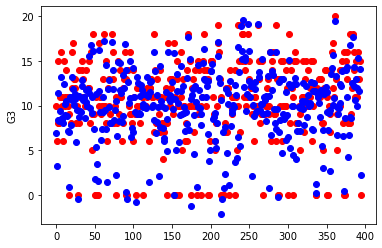

In [46]:
#plot expected results and results obtained from cross validation
#plot the actual values of G3 in red and the predicted values of G3 in blue
plt.plot(total_y,'ro', total_pred, 'bo')
plt.ylabel('G3')